# Практика  домашняя работа 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

from scipy.stats import cosine
import matplotlib.pyplot as plt
from scipy.stats import gausshyper



import pylab
import random


## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
#cosine_rv = sts.cosine()
#sample = cosine_rv.rvs(100)
#sample

#Гауссовская гипергеометрическая непрерывная случайная величина.
#Подсчитаем несколько первых моментов:

a, b, c, z = 13.8, 3.12, 2.51, 5.18
#mean, var, skew, kurt = gausshyper.stats(a, b, c, z, moments='mvsk')
cos = sts.gausshyper(a, b, c, z)
#sample = cos.rvs(100)

#Генерация случайных чисел:
sample = gausshyper.rvs(a, b, c, z, size=100)  # rvs - Случайные варианты
sample




array([0.81004626, 0.89503816, 0.8246357 , 0.79498871, 0.66464358,
       0.85790986, 0.6944672 , 0.80564577, 0.84350207, 0.46383851,
       0.70187056, 0.69012121, 0.76983656, 0.93434503, 0.83996963,
       0.75131322, 0.62016488, 0.69577405, 0.7440723 , 0.81384131,
       0.72757024, 0.73024861, 0.84285069, 0.8284227 , 0.74515182,
       0.73021925, 0.87022824, 0.90375163, 0.69821476, 0.91265781,
       0.80288306, 0.59439334, 0.78625056, 0.8103784 , 0.7070414 ,
       0.67607412, 0.75466705, 0.71550463, 0.82622923, 0.67807093,
       0.90339389, 0.83137222, 0.87560727, 0.87384811, 0.86159664,
       0.44940501, 0.6287997 , 0.56858049, 0.80583698, 0.83773499,
       0.805532  , 0.80610958, 0.69371115, 0.73070764, 0.81350087,
       0.89547164, 0.79301298, 0.70614097, 0.82653422, 0.8566435 ,
       0.65126792, 0.88169994, 0.66704054, 0.93497918, 0.84052745,
       0.88226812, 0.82784203, 0.86093571, 0.95295074, 0.59239961,
       0.83554154, 0.94062467, 0.92205619, 0.79360199, 0.63001

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = sample.mean() # настоящее среднее случайной величины
real_mean

0.7777255890959445

In [5]:
real_var = sample.var() # настоящая дисперсия случайной величины
real_var

0.012267373262400174

### Постройте гистограмму выборки и теоретическую плотность распределения

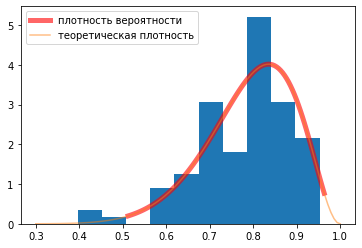

In [6]:
fig, ax = plt.subplots(1, 1)
# функция плотности вероятности ( pdf):

x = np.linspace(gausshyper.ppf(0.01, a, b, c, z),
                gausshyper.ppf(0.99, a, b, c, z), 100)
ax.plot(x, gausshyper.pdf(x, a, b, c, z),
       'r-', lw=5, alpha=0.6, label='плотность вероятности')

# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(0.3,1,100)
pdf = cos.pdf(x) # функция плотности вероятности
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend();

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.7777255890959445
0.012267373262400174


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [ ]:
# из теоремы  знаем, что случайная величина X из практически любого распределения, и из этого распределения 
# слуным образом сформирована выборка объемом N, то выборочное среднее, определенное на основании выборки,
# можно приблизить нормальным распределением со средним значением, которое совпадает с математическим ожиданием 
# исходной совокупности.

# случайной величины X имеет вид: f(x)=l*e^(-l*x)
# где , Математическое ожидание случайной величины X, в соответствии с законом экспоненциального распределения 
#определяется, обратно :  m=1/l
# Дисперсия случайной величины X определяется как q^2=1/l^2
# l=0.0125? m=80 q=6400


In [14]:

# зададим параметр распределения
la = 0.0125

# сформируем диапазон "иксовых" и "игрековых" значений
list_xt = range(600)
list_yt = [(la * math.exp(-la * i)) for i in list_xt]

In [15]:
def sample_expon(value, la, n):
    m = 1/la
    list_x = []
    for i in range(value):
        summa = 0
        for j in range(n):
            summa += m**2*random.expovariate(m)
        list_x.append(summa/n)
    return list_x

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


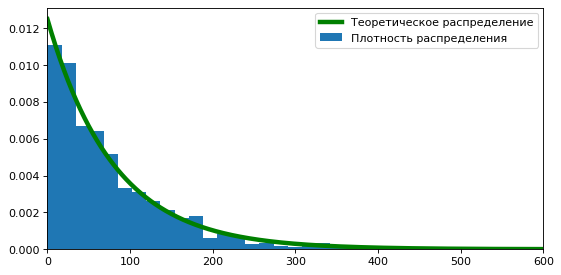

In [17]:
# зададим параметры выборки
value = 1000
n = 1

# сформируем выборку
list_x = sample_expon(value, la, n)

fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(list_x, bins = 'auto', normed = True, label='Плотность распределения')

axes.set_xlim([0,600])
plt.plot(list_xt, list_yt, label='Tеоретическое распределение', color='g', linestyle='-', lw=4)
plt.legend()
plt.show();

In [11]:
# функция для определения теоритической плотности соответствующего (выборке) нормального распределения
def normal_pdf(x, mu, sigma):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2)/(sqrt_two_pi * sigma)) 

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Объем выборки:  10 
Мат. ожидание 80.436 Дисперсия 665.862 Стандарт. откл-е 25.804


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Объем выборки:  100 
Мат. ожидание 79.95 Дисперсия 63.914 Стандарт. откл-е 7.995


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Объем выборки:  1000 
Мат. ожидание 80.056 Дисперсия 6.344 Стандарт. откл-е 2.519


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Объем выборки:  10000 
Мат. ожидание 80.02 Дисперсия 0.668 Стандарт. откл-е 0.817


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Объем выборки:  100000 
Мат. ожидание 79.981 Дисперсия 0.065 Стандарт. откл-е 0.255


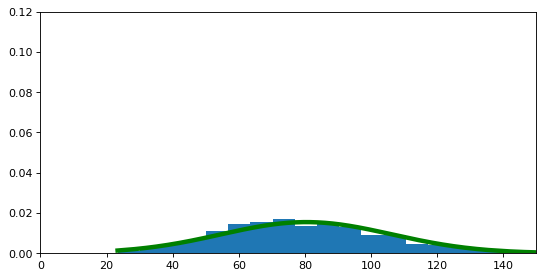

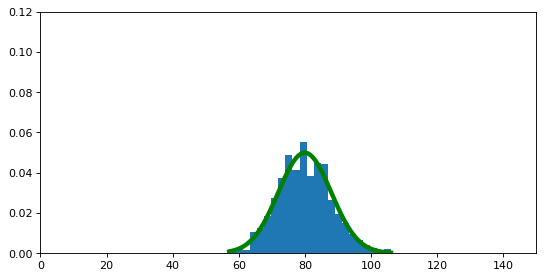

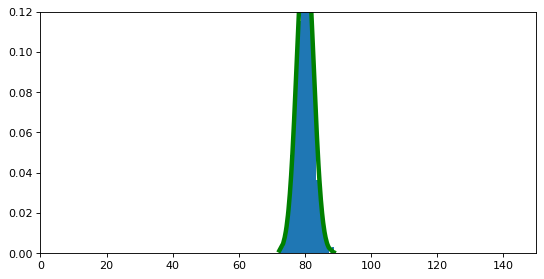

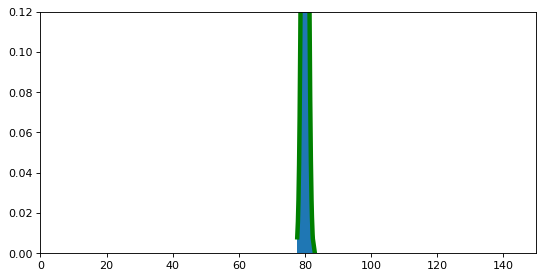

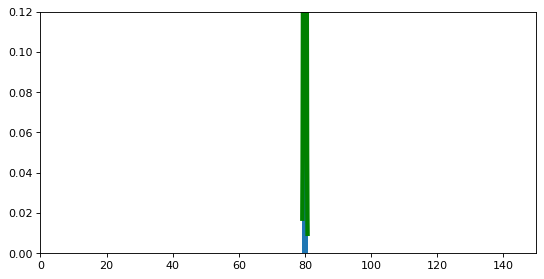

In [12]:
w=1
for n in [10, 100, 1000, 10000, 100000]:
    for i in range(w):
        list_x = sample_expon(value, la, n)
        #print('\033[4m' + 'Объем выборки:', '\033[1m', n, '\033[0m')
        #   гистограмма выборки
        fig, axes = plt.subplots(figsize=(8,4), dpi=80)
        plt.hist(list_x,bins = 'auto', normed = True)
    
        #   график плотности
        axes.set_xlim([0,150])
        axes.set_ylim([0,0.12])
        plt.plot(sorted(list_x),[normal_pdf(x, np.mean(list_x), np.std(list_x)) for x in sorted(list_x)], color='green', lw=4)

        print('\033[4m' + 'Объем выборки:', '\033[1m', n, '\033[0m')
        print('Мат. ожидание',round(np.mean(list_x),3),'Дисперсия',round(np.var(list_x),3),'Стандарт. откл-е',round(np.std(list_x),3))
        
       

    

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
Что касается параметров дисперсии и стандартного отклонения - аппроксимация видна, 
то есть, при увеличении выборки, отклонение выборочных параметров уменьшается от расчетных теоретических. 
НО!!!!! При исследование напрашивается вывод, что
при увеличении объема выборок распределение становится все ближе и ближе к нормальному. 
что видно из наблюдени. Смысл следующий – практически любое распределение можем свести к нормальному посредством ЦПТ, 
при этом с увеличением выборки среднее становится точнее, а дисперсия сокращается. Т.е. точнее предсказываем.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [ ]:
true - ушли

In [2]:
import requests
import csv
import sys
csv.field_size_limit(1000000)
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [13]:
vacs = list(csv.DictReader(open('telecom_churn.csv', encoding='utf-8', newline='')))  #telecom_churn.csv
#url = f'https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing/telecom_churn.csv')
df = pd.read_csv('telecom_churn.csv')
df

NameError: name 'csv' is not defined

In [75]:
vacs[0]

OrderedDict([('state', 'KS'),
             ('account length', '128'),
             ('area code', '415'),
             ('phone number', '382-4657'),
             ('international plan', 'no'),
             ('voice mail plan', 'yes'),
             ('number vmail messages', '25'),
             ('total day minutes', '265.1'),
             ('total day calls', '110'),
             ('total day charge', '45.07'),
             ('total eve minutes', '197.4'),
             ('total eve calls', '99'),
             ('total eve charge', '16.78'),
             ('total night minutes', '244.7'),
             ('total night calls', '91'),
             ('total night charge', '11.01'),
             ('total intl minutes', '10.0'),
             ('total intl calls', '3'),
             ('total intl charge', '2.7'),
             ('customer service calls', '1'),
             ('churn', 'False')])

In [ ]:
Пусть  𝜎2=0.1 . Доверительные интервалы
𝑋¯𝑛±𝑧1−𝛼2𝜎𝑛⎯⎯√

In [3]:
#Оценка среднего
knn_auc_scores = df.cross_val_score(neighbors.KNeighborsClassifier(7), 
                                 'total day calls','churn', scoring = 'roc_auc', cv = 20)
# выборочные дисперсии, и доверительные интервалы 
#knn_mean_std = knn_auc_scores.std(ddof=1)/sqrt(len(knn_auc_scores))

NameError: name 'df' is not defined

In [6]:
sum=0
kol=0
for i in range(0,len(vacs)):
    k=vacs[i]
    l = k.get('total day calls').upper()
    d= k.get('churn').upper()
    #print(l)
    #knn_auc_scores = model_selection.cross_val_score(neighbors.KNeighborsClassifier(7), l,  scoring = 'roc_auc', cv = 20)
    if d== 'TRUE':
        df['age_total_day_calls'] = pd.cut(df['total day calls'], 10)
        

48945 483


In [9]:
#доверительные интервалы для среднего значения total day calls, 
# в разбиении по колонке churn (ушел/не ушел). TRUE
percentage_by_age = df.groupby('age_total_day_calls')['churn'].sum() / df.groupby('age_total_day_calls')['churn'].count()

percentage_by_age


age_total_day_calls
(-0.165, 16.5]    0.500000
(16.5, 33.0]      0.000000
(33.0, 49.5]      0.368421
(49.5, 66.0]      0.151515
(66.0, 82.5]      0.123620
(82.5, 99.0]      0.130746
(99.0, 115.5]     0.145015
(115.5, 132.0]    0.166960
(132.0, 148.5]    0.170732
(148.5, 165.0]    0.190476
Name: churn, dtype: float64

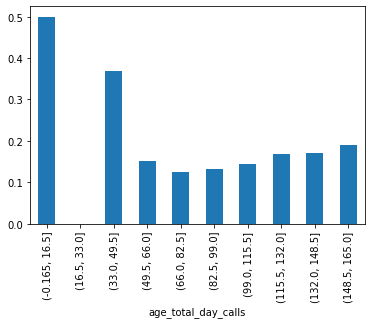

In [95]:
percentage_by_age.plot.bar();